In [2]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load dataset
file_path = "/content/drive/MyDrive/Minor_project6thsem/Datasets/DDoS SDN Tree/LR-HR DDoS 2024 Dataset for SDN-Based Networks.csv"
df = pd.read_csv(file_path,low_memory=False)

In [4]:
df.shape

(113407, 25)

Final Average Accuracy: 0.9741

In [19]:
df.shape


(113407, 25)


Training Fold 1...
Epoch 1 Accuracy: 0.9397
Epoch 2 Accuracy: 0.9795
Epoch 3 Accuracy: 0.9836
Epoch 4 Accuracy: 0.9851
Epoch 5 Accuracy: 0.9864
Epoch 6 Accuracy: 0.9871
Epoch 7 Accuracy: 0.9884
Epoch 8 Accuracy: 0.9890
Epoch 9 Accuracy: 0.9891
Epoch 10 Accuracy: 0.9903
Final Test Accuracy: 0.9984
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14102
           1       1.00      1.00      1.00     14102

    accuracy                           1.00     28204
   macro avg       1.00      1.00      1.00     28204
weighted avg       1.00      1.00      1.00     28204



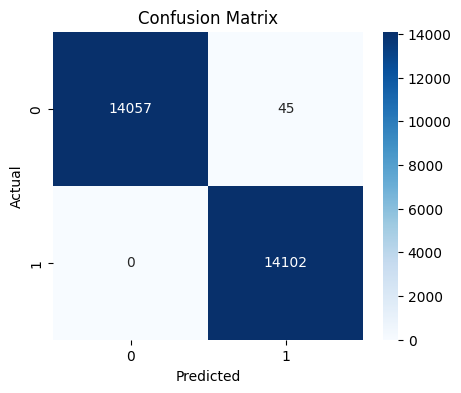

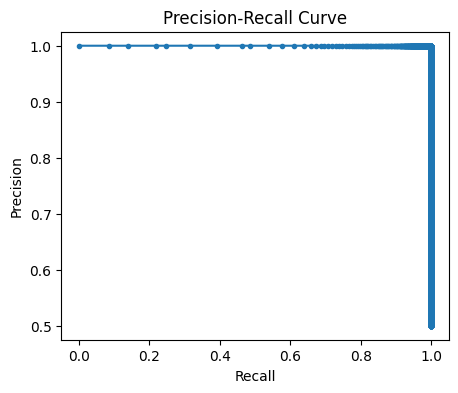

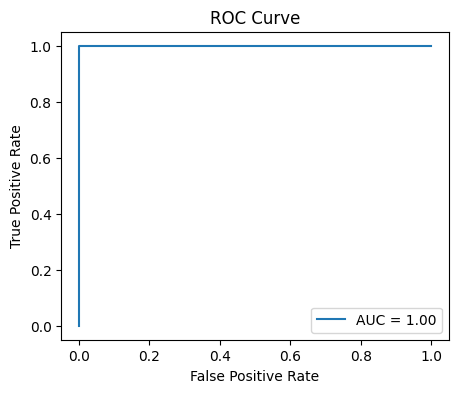

Fold 1 Final Accuracy: 0.9984

Training Fold 2...
Epoch 1 Accuracy: 0.9712
Epoch 2 Accuracy: 0.9820
Epoch 3 Accuracy: 0.9853
Epoch 4 Accuracy: 0.9864
Epoch 5 Accuracy: 0.9875
Epoch 6 Accuracy: 0.9880
Epoch 7 Accuracy: 0.9887
Epoch 8 Accuracy: 0.9888
Epoch 9 Accuracy: 0.9899
Epoch 10 Accuracy: 0.9900
Final Test Accuracy: 0.9959
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     14102
           1       0.99      1.00      1.00     14101

    accuracy                           1.00     28203
   macro avg       1.00      1.00      1.00     28203
weighted avg       1.00      1.00      1.00     28203



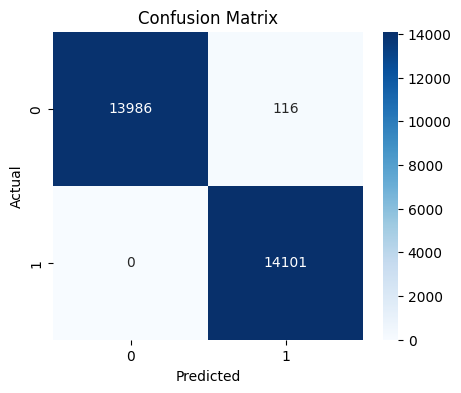

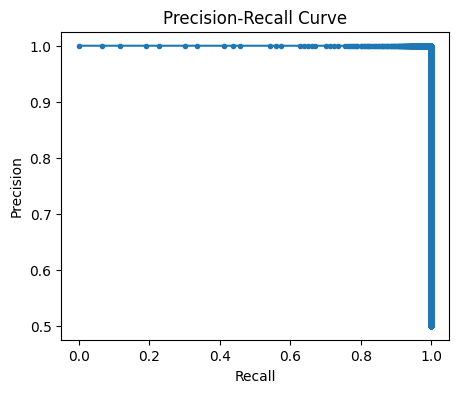

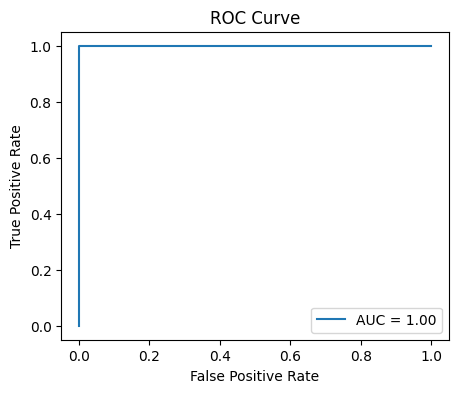

Fold 2 Final Accuracy: 0.9959

Training Fold 3...
Epoch 1 Accuracy: 0.9630
Epoch 2 Accuracy: 0.9827
Epoch 3 Accuracy: 0.9854
Epoch 4 Accuracy: 0.9863
Epoch 5 Accuracy: 0.9869
Epoch 6 Accuracy: 0.9881
Epoch 7 Accuracy: 0.9881
Epoch 8 Accuracy: 0.9890
Epoch 9 Accuracy: 0.9895
Epoch 10 Accuracy: 0.9898
Final Test Accuracy: 0.9987
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14102
           1       1.00      1.00      1.00     14101

    accuracy                           1.00     28203
   macro avg       1.00      1.00      1.00     28203
weighted avg       1.00      1.00      1.00     28203



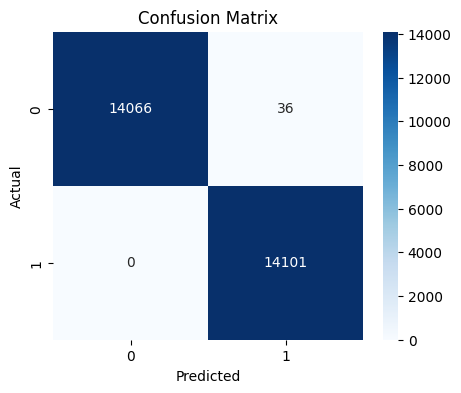

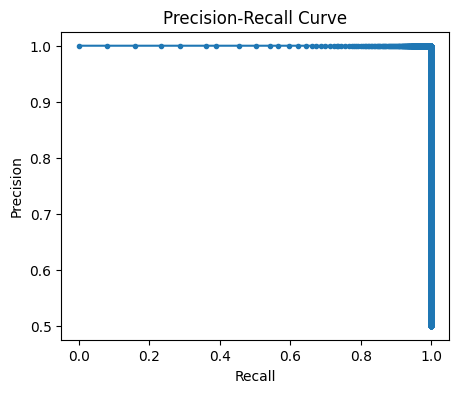

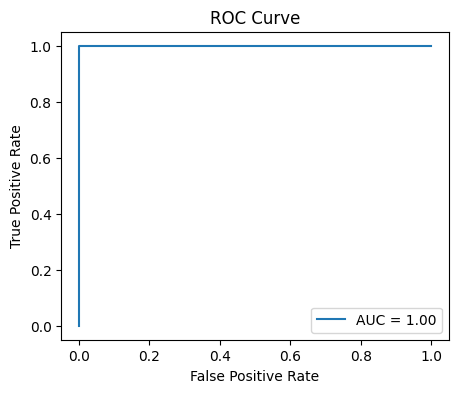

Fold 3 Final Accuracy: 0.9987

Training Fold 4...
Epoch 1 Accuracy: 0.9705
Epoch 2 Accuracy: 0.9819
Epoch 3 Accuracy: 0.9836
Epoch 4 Accuracy: 0.9864
Epoch 5 Accuracy: 0.9870
Epoch 6 Accuracy: 0.9873
Epoch 7 Accuracy: 0.9880
Epoch 8 Accuracy: 0.9888
Epoch 9 Accuracy: 0.9893
Epoch 10 Accuracy: 0.9895
Final Test Accuracy: 0.9990
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14101
           1       1.00      1.00      1.00     14102

    accuracy                           1.00     28203
   macro avg       1.00      1.00      1.00     28203
weighted avg       1.00      1.00      1.00     28203



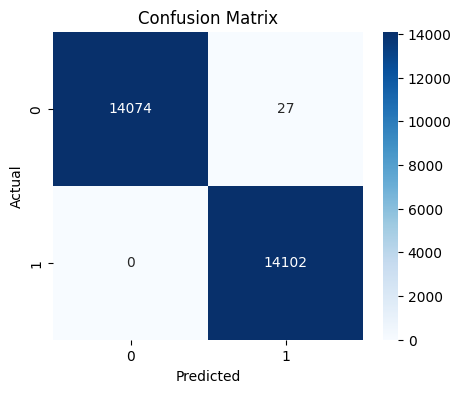

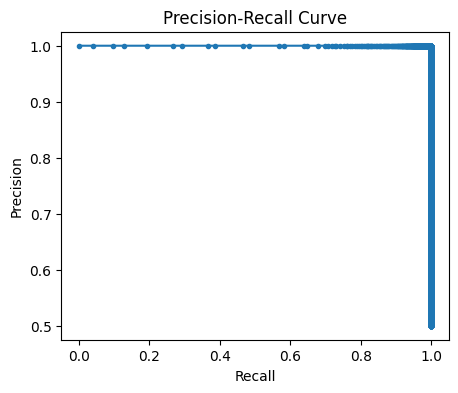

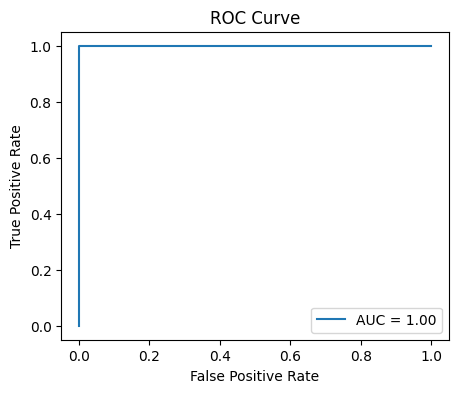

Fold 4 Final Accuracy: 0.9990

Training Fold 5...
Epoch 1 Accuracy: 0.9651
Epoch 2 Accuracy: 0.9815
Epoch 3 Accuracy: 0.9840
Epoch 4 Accuracy: 0.9855
Epoch 5 Accuracy: 0.9867
Epoch 6 Accuracy: 0.9870
Epoch 7 Accuracy: 0.9874
Epoch 8 Accuracy: 0.9885
Epoch 9 Accuracy: 0.9886
Epoch 10 Accuracy: 0.9887
Final Test Accuracy: 0.9956
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     14101
           1       0.99      1.00      1.00     14102

    accuracy                           1.00     28203
   macro avg       1.00      1.00      1.00     28203
weighted avg       1.00      1.00      1.00     28203



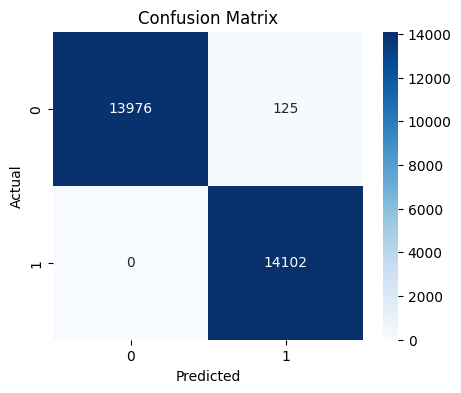

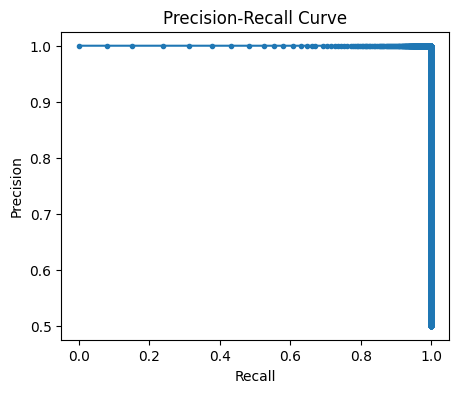

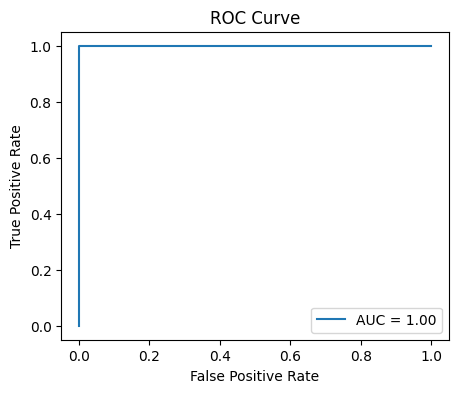

Fold 5 Final Accuracy: 0.9956

Final Average Accuracy: 0.9975


In [4]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, Subset
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, roc_curve, auc

# Encode categorical variables
label_encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col])

# Define features and target
X = df.drop(columns=['Label']).values
y = df['Label'].values

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Convert data to PyTorch tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y_resampled, dtype=torch.long)

# Define the neural network with Batch Normalization and Dropout
class ImprovedFedNN(nn.Module):
    def __init__(self, input_size):
        super(ImprovedFedNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 2)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = self.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = self.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.fc4(x)
        return x

# Function to split data into federated clients
def split_federated_data(indices, X, y, num_clients=5):
    split_size = len(indices) // num_clients
    client_datasets = []
    for i in range(num_clients):
        start = i * split_size
        end = (i + 1) * split_size if i != num_clients - 1 else len(indices)
        dataset = Subset(TensorDataset(X[indices], y[indices]), range(start, end))
        client_datasets.append(DataLoader(dataset, batch_size=64, shuffle=True))
    return client_datasets

# Federated averaging function
def federated_averaging(global_model, client_models):
    global_state_dict = global_model.state_dict()
    for key in global_state_dict.keys():
        global_state_dict[key] = torch.stack(
            [client_models[i].state_dict()[key].float() for i in range(len(client_models))], dim=0
        ).mean(dim=0)
    global_model.load_state_dict(global_state_dict)

# Train federated clients
def train_federated(global_model, client_loaders, epochs=10, patience=5):
    criterion = nn.CrossEntropyLoss()
    best_acc = 0
    patience_counter = 0

    for epoch in range(epochs):
        client_models = []
        epoch_accuracies = []
        for client_loader in client_loaders:
            model = ImprovedFedNN(input_size=X.shape[1])
            model.load_state_dict(global_model.state_dict())
            optimizer = optim.SGD(model.parameters(), lr=1e-3, momentum=0.9)

            model.train()
            correct, total = 0, 0
            for X_batch, y_batch in client_loader:
                optimizer.zero_grad()
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                loss.backward()
                optimizer.step()
                _, predicted = torch.max(outputs, 1)
                total += y_batch.size(0)
                correct += (predicted == y_batch).sum().item()

            epoch_accuracies.append(correct / total)
            client_models.append(model)

        avg_acc = np.mean(epoch_accuracies)
        print(f"Epoch {epoch+1} Accuracy: {avg_acc:.4f}")
        federated_averaging(global_model, client_models)

        if avg_acc > best_acc:
            best_acc = avg_acc
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print("Early stopping triggered.")
            break

# Evaluate model
def evaluate_model(model, test_loader):
    model.eval()
    y_true, y_pred, y_probs = [], [], []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(y_batch.numpy())
            y_pred.extend(predicted.numpy())
            y_probs.extend(torch.softmax(outputs, dim=1)[:, 1].numpy())

    acc = accuracy_score(y_true, y_pred)
    print(f"Final Test Accuracy: {acc:.4f}")
    print(classification_report(y_true, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_true, y_probs)
    plt.figure(figsize=(5, 4))
    plt.plot(recall, precision, marker='.')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()

     # ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(5, 4))
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()



    return acc

# 5-Fold Cross Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_accuracies = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_tensor, y_tensor)):
    print(f"\nTraining Fold {fold+1}...")
    client_loaders = split_federated_data(train_idx, X_tensor, y_tensor, num_clients=5)
    test_loader = DataLoader(TensorDataset(X_tensor[val_idx], y_tensor[val_idx]), batch_size=64, shuffle=False)

    global_model = ImprovedFedNN(input_size=X.shape[1])
    train_federated(global_model, client_loaders, epochs=10, patience=5)

    final_acc = evaluate_model(global_model, test_loader)
    fold_accuracies.append(final_acc)
    print(f"Fold {fold+1} Final Accuracy: {final_acc:.4f}")

print(f"\nFinal Average Accuracy: {np.mean(fold_accuracies):.4f}")
